In [6]:
%%time
dataset_name = "W25_only"
df_list = "BES_Panel"
#|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (570, 13)
CPU times: total: 656 ms
Wall time: 31.8 s


In [3]:
scott_dataset = pd.read_csv("C:\\Users\\Gamer\\Downloads\\2024-UK-General-Election-Census-Constituency-Summaries-File-v1.1.csv")

In [7]:
scott_dataset.columns

Index(['pano', 'ONSConstID', 'ConstituencyName', 'Country', 'Region',
       'ConstituencyType', 'Winner24', 'Second24', 'Con24', 'Lab24',
       ...
       'c21LanguageSomeEnglish', 'c21LanguageLimitedtoNoEnglish',
       'c21IdentityScottishOnly', 'c21IdentityBritishOnly',
       'c21IdentityScottishandBritish', 'c21IdentityScottishandOther',
       'c21IdentityEnglishOnly', 'c21IdentityAnyOther', 'c21ChurchofScotland',
       'c21Catholic'],
      dtype='object', length=242)

In [9]:
search(scott_dataset,"c21")

c21Population                  632
c21PopulationDensity           575
c21Households                  575
c21Communal                    575
c21Female                      632
                              ... 
c21IdentityScottishandOther     57
c21IdentityEnglishOnly          57
c21IdentityAnyOther             57
c21ChurchofScotland             57
c21Catholic                     57
Length: 183, dtype: int64

In [13]:
scott_dataset.notnull().sum().sort_values().head(50)

c21AnyWelsh                         32
c21NoWelsh                          32
ScotRefNo                           57
ScotRefYes                          57
c21ChurchofScotland                 57
c21LanguageSomeEnglish              57
c21LanguageLimitedtoNoEnglish       57
c21Catholic                         57
c21IdentityBritishOnly              57
c21IdentityScottishandBritish       57
c21IdentityScottishandOther         57
c21IdentityEnglishOnly              57
c21IdentityAnyOther                 57
c21IdentityScottishOnly             57
c21NSSECLowerManager               575
c21NSSECIntermediate               575
c21NSSECSmallEmployer              575
c21NSSECLowerSupervisor            575
c21NSSECSemiRoutine                575
c21NSSECRoutine                    575
c21NSSECNeverWorked                575
c21Unemployed                      575
c21NSSECFulltimeStudent            575
c21Employed                        575
c21SelfEmployedwithEmployees       575
c21SelfEmployedwithoutEmp

In [17]:
scott_dataset.notnull().sum()[ scott_dataset.notnull().sum()==575 ].tail(50)

c21Employed                        575
c21SelfEmployedwithEmployees       575
c21SelfEmployedwithoutEmployees    575
c21Unemployed                      575
c21EmployedFTStudent               575
c21UnemployedFTStudent             575
c21InactiveRetired                 575
c21InactiveFTStudent               575
c21InactiveLookingAfterHome        575
c21InactiveLongTermSick            575
c21InactiveOther                   575
c21IndustryAgriculture             575
c21IndustryMining                  575
c21IndustryManufacturing           575
c21IndustryElectricitySupply       575
c21IndustryWaterSupply             575
c21IndustryConstruction            575
c21IndustryWholesale               575
c21IndustryTransport               575
c21IndustryAccommodation           575
c21IndustryCommunication           575
c21IndustryFinance                 575
c21IndustryRealEstate              575
c21IndustryProfessional            575
c21IndustryAdministrative          575
c21IndustryPublicAdminist

In [31]:
census_english_vars = list(scott_dataset.notnull().sum()[ scott_dataset.notnull().sum()==575 ].index)
census_welsh_vars = list(scott_dataset.notnull().sum()[ scott_dataset.notnull().sum()==32 ].index)
census_scottish_vars = list(scott_dataset.notnull().sum()[ scott_dataset.notnull().sum()==57 ].index)
rem_vars = [x for x in scott_dataset.columns if x not in (census_english_vars+census_welsh_vars+census_scottish_vars)]
census_britain_vars = list( search(scott_dataset[rem_vars],"c21").index )
rem_vars = [x for x in scott_dataset.columns if x not in (census_english_vars+census_welsh_vars+census_scottish_vars+census_britain_vars)]

In [ ]:
# welsh/scot

# c21AnyWelsh                         32
# c21NoWelsh                          32

# ScotRefNo                           57
# ScotRefYes                          57
# c21ChurchofScotland                 57
# c21LanguageSomeEnglish              57
# c21LanguageLimitedtoNoEnglish       57
# c21Catholic                         57
# c21IdentityBritishOnly              57
# c21IdentityScottishandBritish       57
# c21IdentityScottishandOther         57
# c21IdentityEnglishOnly              57
# c21IdentityAnyOther                 57
# c21IdentityScottishOnly             57

# 100 English variables 575

In [34]:
scott_dataset[rem_vars].columns

Index(['pano', 'ONSConstID', 'ConstituencyName', 'Country', 'Region',
       'ConstituencyType', 'Winner24', 'Second24', 'Con24', 'Lab24', 'LD24',
       'SNP24', 'PC24', 'Green24', 'RUK24', 'Other24', 'Majority24',
       'Turnout24', 'ConVote24', 'LabVote24', 'LDVote24', 'SNPVote24',
       'PCVote24', 'GreenVote24', 'RUKVote24', 'OtherVote24', 'TotalVote24',
       'RejectedVote24', 'Electorate24', 'MPFirstName24', 'MPSurname24',
       'MPGender24', 'IndexOfChange', 'Winner19', 'Second19', 'Con19', 'Lab19',
       'LD19', 'SNP19', 'PC19', 'Green19', 'Brexit19', 'Other19', 'Majority19',
       'Turnout19', 'ConVote19', 'LabVote19', 'LDVote19', 'SNPVote19',
       'PCVote19', 'GreenVote19', 'BrexitVote19', 'OtherVote19', 'TotalVote19',
       'Electorate19', 'HanrettyLeave', 'HanrettyRemain'],
      dtype='object')

In [30]:
# constituency name/id/type
# 'pano', 'ONSConstID', 'ConstituencyName', 'Country', 'Region',        'ConstituencyType',

# electoral
# 'Winner24', 'Second24', 'Con24', 'Lab24', 'LD24',
#        'SNP24', 'PC24', 'Green24', 'RUK24', 'Other24', 'Majority24',
#        'Turnout24', 'ConVote24', 'LabVote24', 'LDVote24', 'SNPVote24',
#        'PCVote24', 'GreenVote24', 'RUKVote24', 'OtherVote24', 'TotalVote24',
#        'RejectedVote24', 'Electorate24', 'MPFirstName24', 'MPSurname24',
#        'MPGender24', 'IndexOfChange', 'Winner19', 'Second19', 'Con19', 'Lab19',
#        'LD19', 'SNP19', 'PC19', 'Green19', 'Brexit19', 'Other19', 'Majority19',
#        'Turnout19', 'ConVote19', 'LabVote19', 'LDVote19', 'SNPVote19',
#        'PCVote19', 'GreenVote19', 'BrexitVote19', 'OtherVote19', 'TotalVote19',
#        'Electorate19', 'HanrettyLeave', 'HanrettyRemain'


# still not clear what "IndexOfChange" is

c21Population           632
c21Female               632
c21Male                 632
c21Age0to4              632
c21Age5to9              632
                       ... 
c21Muslim               632
c21Sikh                 632
c21ReligionOther        632
c21NoReligion           632
c21ReligionNotStated    632
Length: 69, dtype: int64

In [36]:
scott_dataset['IndexOfChange'].value_counts()

IndexOfChange
none    77
12.6     5
13.6     5
8.5      4
7.7      4
        ..
21.4     1
89.9     1
41.7     1
40.6     1
8.1      1
Name: count, Length: 401, dtype: int64

In [38]:
scott_dataset.dtypes.value_counts()

float64    206
int64       23
object      13
Name: count, dtype: int64

In [46]:
scott_dataset.select_dtypes('int64')

,pano,ConVote24,LabVote24,LDVote24,SNPVote24,PCVote24,GreenVote24,RUKVote24,OtherVote24,TotalVote24,...,LabVote19,LDVote19,SNPVote19,PCVote19,GreenVote19,BrexitVote19,OtherVote19,TotalVote19,Electorate19,c21Population
0,1,2903,17838,916,0,4719,1094,7484,801,35755,...,23509,1645,0,3991,701,3794,731,44423,69817,92575
1,2,5881,12773,2583,14533,0,1275,3781,1269,42095,...,6005,3875,26516,0,612,813,0,50127,76895,111947
2,3,11300,11455,2921,15213,0,1609,3199,648,46345,...,4394,5358,22683,0,268,195,0,50118,76560,112074
3,4,12513,3876,2782,13455,0,0,5562,0,38188,...,1914,2028,19775,0,0,0,0,45891,71485,97578
4,6,1696,18871,725,11324,0,0,2971,1079,36666,...,15343,1652,20667,0,676,0,0,46338,70420,93041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,646,5392,20596,1985,0,0,4133,5986,1040,39132,...,23855,3111,0,0,1559,2717,58,44759,76971,111581
628,647,11497,3002,23765,0,0,2403,7677,608,48952,...,3419,16839,0,0,1518,0,875,54128,76056,104875
629,648,9953,7619,439,0,10590,604,3223,200,32628,...,10991,0,0,10418,0,2184,0,36552,52415,68878
630,649,5383,24537,3051,0,0,5185,4721,446,43323,...,28260,3919,0,0,2098,1216,691,50102,74854,109270


In [45]:
scott_dataset["IndexOfChange_num"] = scott_dataset["IndexOfChange"].replace("none",np.nan).astype(float)
temp = pd.get_dummies(scott_dataset["Country"],prefix="Country").astype('float')
scott_dataset[temp.columns]=temp
temp = pd.get_dummies(scott_dataset["Region"],prefix="Region").astype('float')
scott_dataset[temp.columns]=temp

In [47]:
scott_dataset.select_dtypes('float')

,Con24,Lab24,LD24,SNP24,PC24,Green24,RUK24,Other24,Majority24,Turnout24,...,Region_East of England,Region_London,Region_North East,Region_North West,Region_Scotland,Region_South East,Region_South West,Region_Wales,Region_West Midlands,Region_Yorkshire and The Humber
0,8.119144,49.889526,2.561879,0.000000,13.198154,3.059712,20.931338,2.240246,28.958188,49.262882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13.970780,30.343271,6.136121,34.524290,0.000000,3.028863,8.982064,3.014610,4.181019,55.442871,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,24.382350,24.716798,6.302730,32.825548,0.000000,3.471788,6.902578,1.398209,8.108750,59.933013,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,32.766838,10.149785,7.285011,35.233581,0.000000,0.000000,14.564785,0.000000,2.466743,54.509121,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.625539,51.467299,1.977309,30.884198,0.000000,0.000000,8.102875,2.942781,20.583102,52.231513,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,13.779004,52.632117,5.072575,0.000000,0.000000,10.561689,15.296944,2.657671,37.335173,50.319544,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
628,23.486272,6.132538,48.547557,0.000000,0.000000,4.908890,15.682710,1.242033,25.061285,61.252784,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
629,30.504475,23.351109,1.345470,0.000000,32.456786,1.851171,9.878019,0.612970,1.952311,61.398920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
630,12.425271,56.637352,7.042449,0.000000,0.000000,11.968239,10.897214,1.029476,44.212081,54.455296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [114]:
scott_dataset_num = scott_dataset.select_dtypes('float')

,r,p,N
HanrettyLeave,0.860000,0.00,632
c21NSSECLowerSupervisor,0.750000,0.00,575
c21HouseholdCohabitDependents,0.740000,0.00,575
c21HouseholdCohabitNondependents,0.710000,0.00,575
c21QualLevel2,0.690000,0.00,575
c21QualApprentice,0.680000,0.00,575
c21NSSECSemiRoutine,0.670000,0.00,575
c21QualLevel1,0.660000,0.00,575
c21HealthFair,0.650000,0.00,575
c21NSSECRoutine,0.620000,0.00,575


MSE: 12.88, MAE: 2.07, EV: 0.74, R2: 0.74


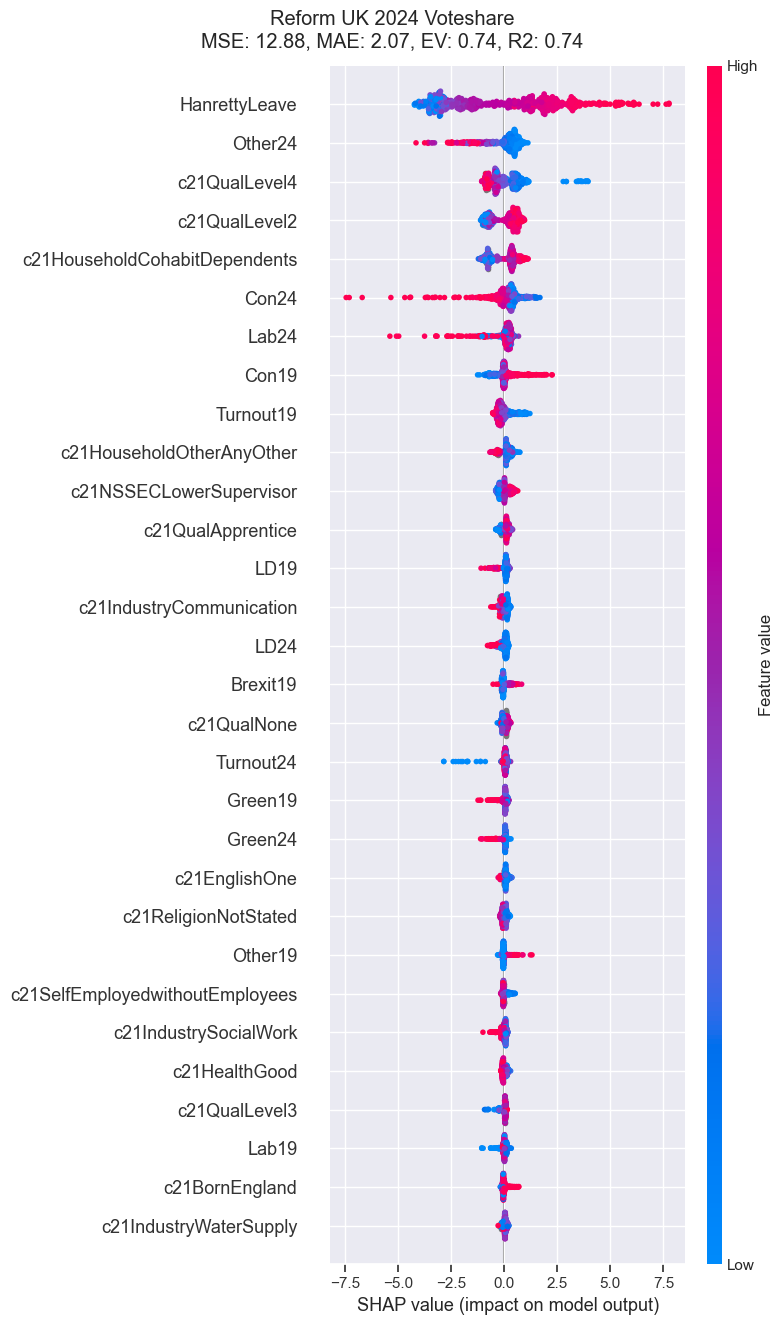

CPU times: total: 3 s
Wall time: 3 s


In [115]:
%%time
name="RUK24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Reform UK 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"],verbosity=0)

,r,p,N
Con19,0.880000,0.00,632
c21CarsFour,0.740000,0.00,575
c21CarsThree,0.730000,0.00,575
c21CarsTwo,0.710000,0.00,575
c21HouseholdOneFamily66plus,0.650000,0.00,575
c21HouseholdMarriedNoChildren,0.620000,0.00,575
c21HouseOutright,0.590000,0.00,575
c21NSSECSmallEmployer,0.590000,0.00,575
c21Age85plus,0.580000,0.00,632
c21NSSECHigherManager,0.570000,0.00,575


MSE: 10.92, MAE: 2.42, EV: 0.90, R2: 0.90


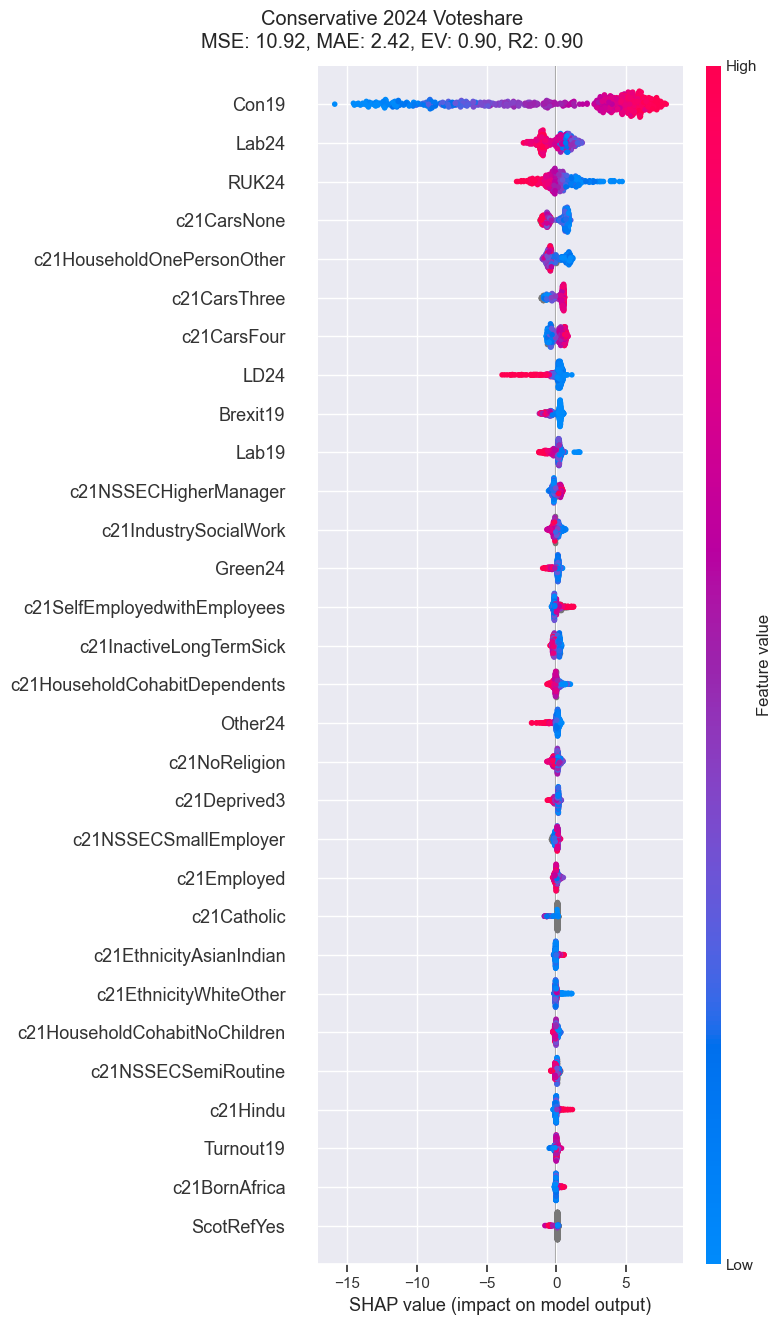

CPU times: total: 4.56 s
Wall time: 4.25 s


In [116]:
%%time
name="Con24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Conservative 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"],verbosity=0)

,r,p,N
Lab19,0.820000,0.00,632
c21CarsNone,0.690000,0.00,575
c21HouseholdOnePersonOther,0.650000,0.00,575
c21Deprived3,0.600000,0.00,575
c21HouseholdLoneDependents,0.600000,0.00,575
Majority24,0.570000,0.00,632
c21Age25to29,0.570000,0.00,632
c21PopulationDensity,0.560000,0.00,575
c21NSSECNeverWorked,0.560000,0.00,575
c21Age30to34,0.550000,0.00,632


MSE: 12.65, MAE: 2.68, EV: 0.94, R2: 0.93


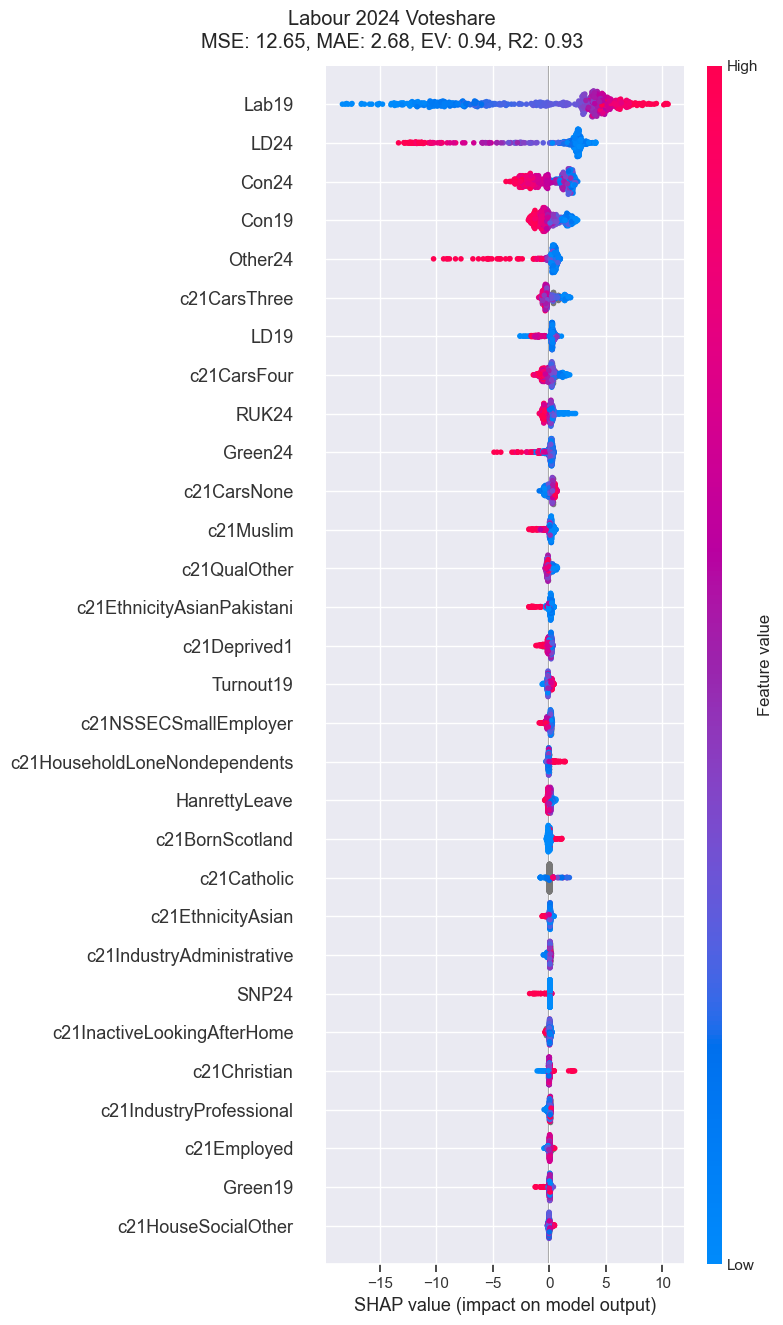

CPU times: total: 4.38 s
Wall time: 4.2 s


In [117]:
%%time
name="Lab24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Labour 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"],verbosity=0)

,r,p,N
LD19,0.830000,0.00,632
c21BornOceania,0.610000,0.00,632
c21DeprivedNone,0.580000,0.00,575
c21NSSECHigherManager,0.580000,0.00,575
c21PassportOceania,0.570000,0.00,632
Turnout24,0.570000,0.00,632
c21NSSECLowerManager,0.550000,0.00,575
c21NSSECHigherProfessional,0.550000,0.00,575
Turnout19,0.540000,0.00,632
c21IndustryProfessional,0.520000,0.00,575


MSE: 13.59, MAE: 2.34, EV: 0.92, R2: 0.92


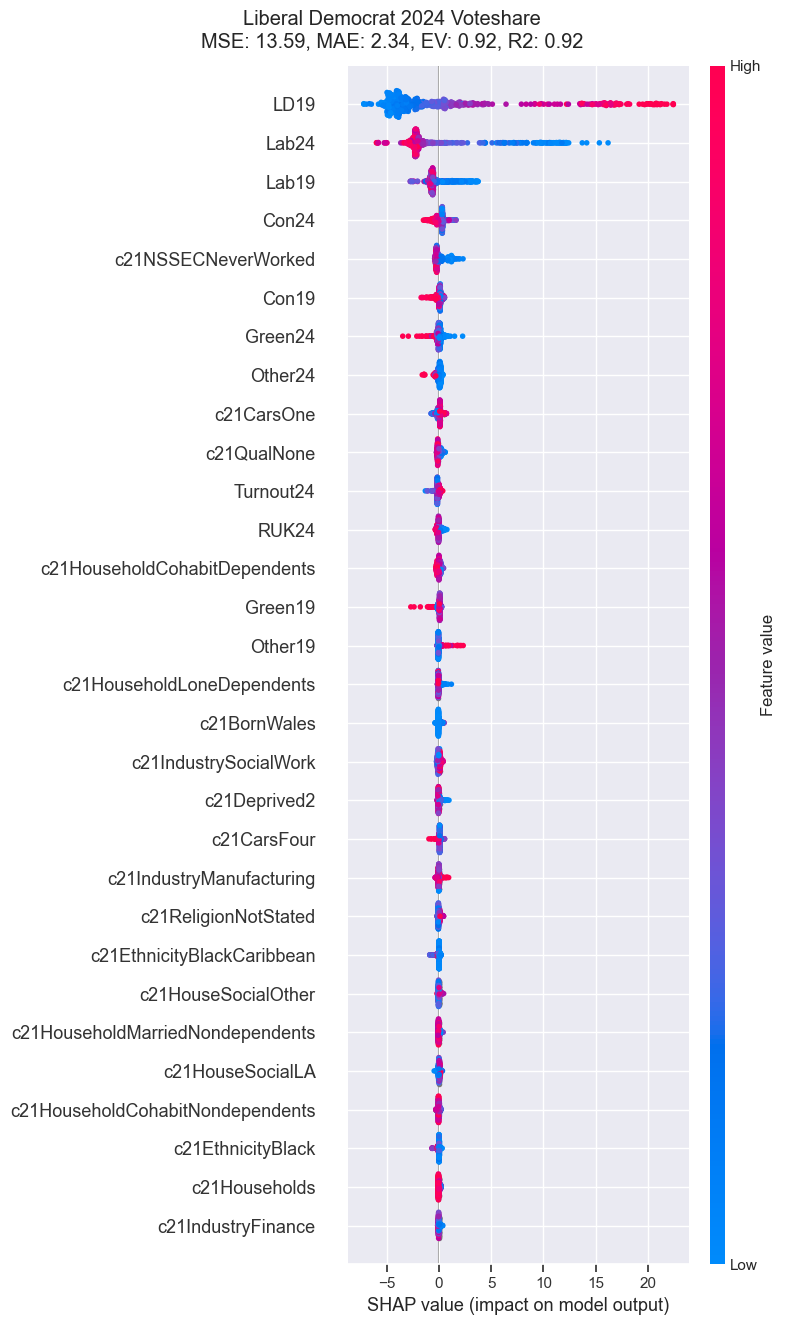

CPU times: total: 3.19 s
Wall time: 3.16 s


In [118]:
%%time
name="LD24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Liberal Democrat 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"],verbosity=0)

,r,p,N
c21EthnicityMixed,0.560000,0.00,632
Lab19,0.530000,0.00,632
c21EthnicityBlack,0.520000,0.00,632
c21EthnicityMixedAfrican,0.520000,0.00,575
c21EthnicityOther,0.510000,0.00,632
c21EthnicityMixedOther,0.500000,0.00,575
c21EthnicityAnyOther,0.500000,0.00,632
c21EthnicityBlackOther,0.500000,0.00,632
c21EthnicityBlackCaribbean,0.500000,0.00,632
c21EthnicityBlackAfrican,0.500000,0.00,632


MSE: 14.98, MAE: 2.03, EV: 0.49, R2: 0.49


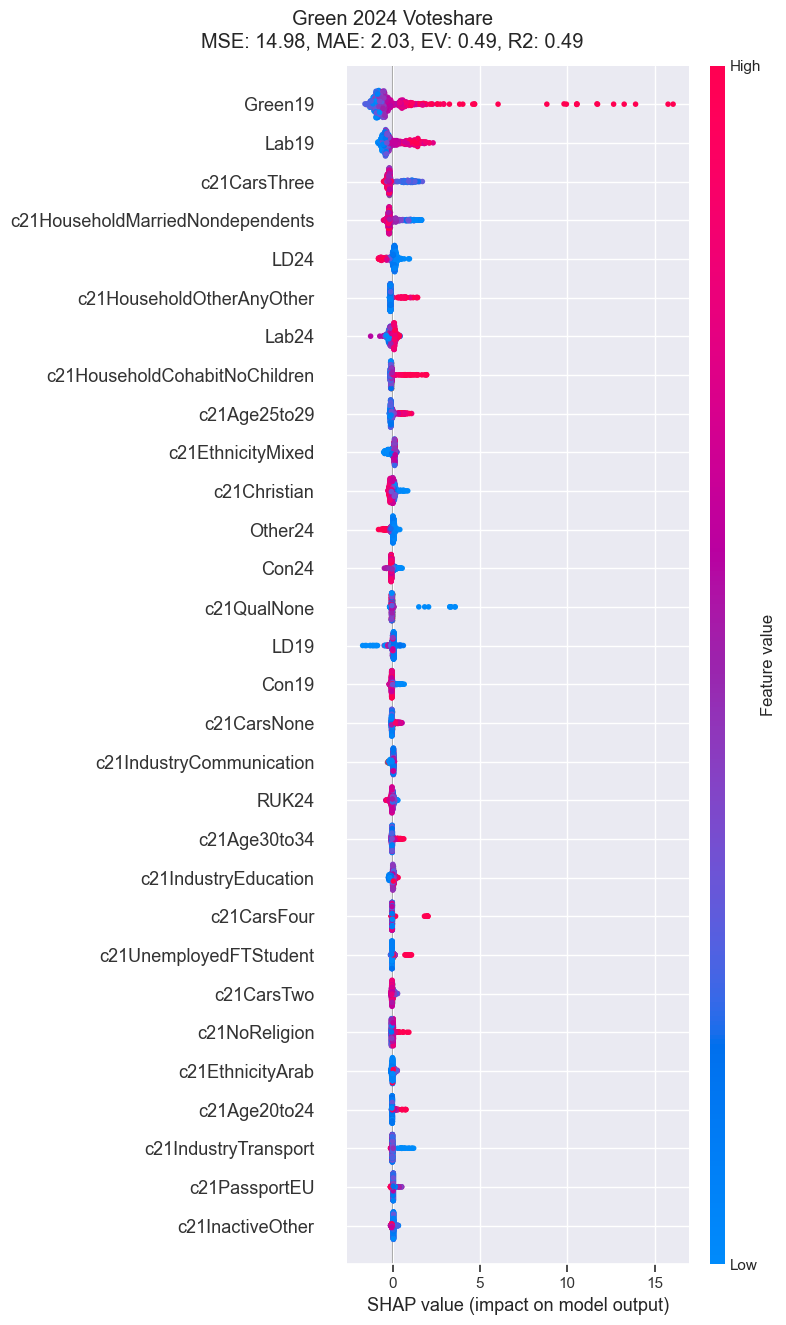

CPU times: total: 1.53 s
Wall time: 1.84 s


In [119]:
%%time
name="Green24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Green 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"],verbosity=0)

MSE: 12.72, MAE: 2.57, EV: 0.62, R2: 0.61


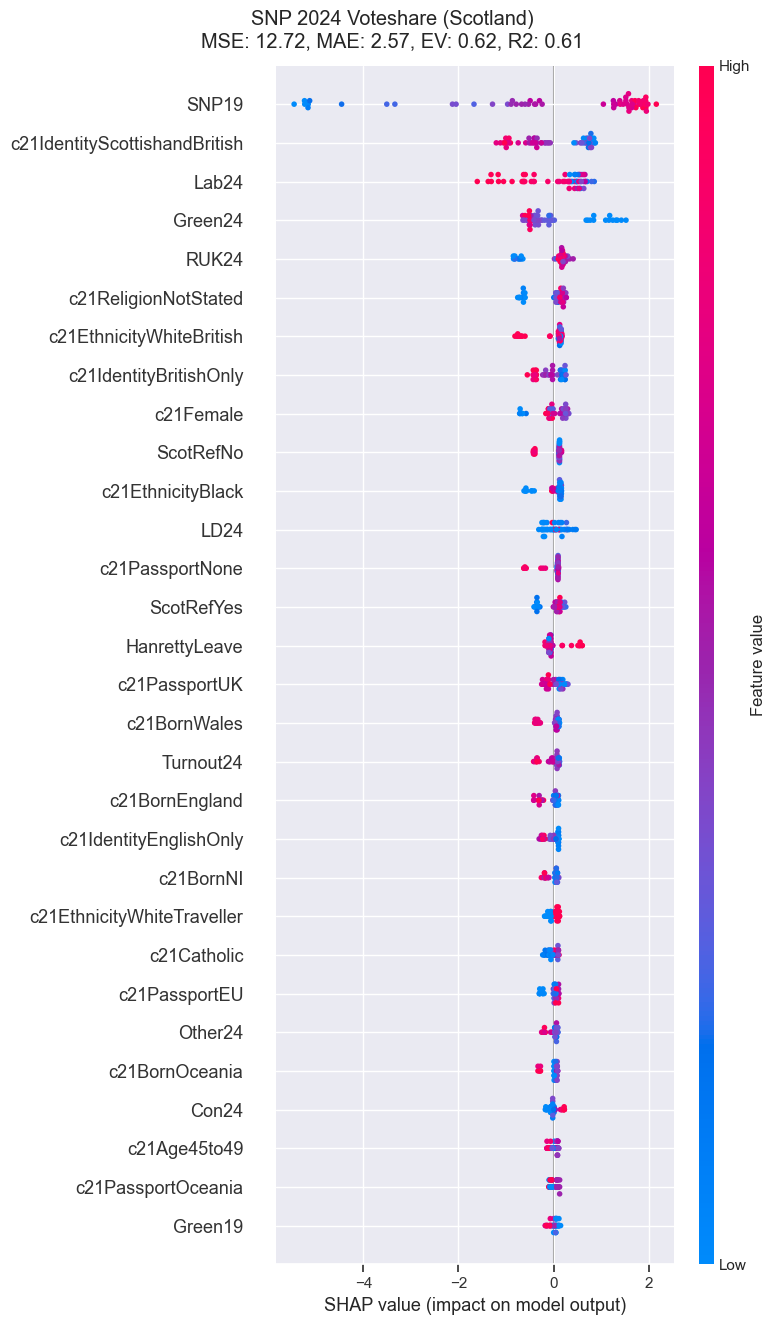

CPU times: total: 1.22 s
Wall time: 1.49 s


In [120]:
%%time
name="SNP24"
scot_drops = list(scott_dataset_num[scotland].var()[scott_dataset_num[scotland].var()==0].index)
# df, corr_type = make_corr_summary(scott_dataset_num[scotland], name)
# display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "SNP 2024 Voteshare (Scotland)",dataset=scott_dataset_num[scotland],
                                                    var_list = [name],var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"]+scot_drops,
    verbosity=0)

MSE: 79.57, MAE: 5.48, EV: 0.62, R2: 0.60


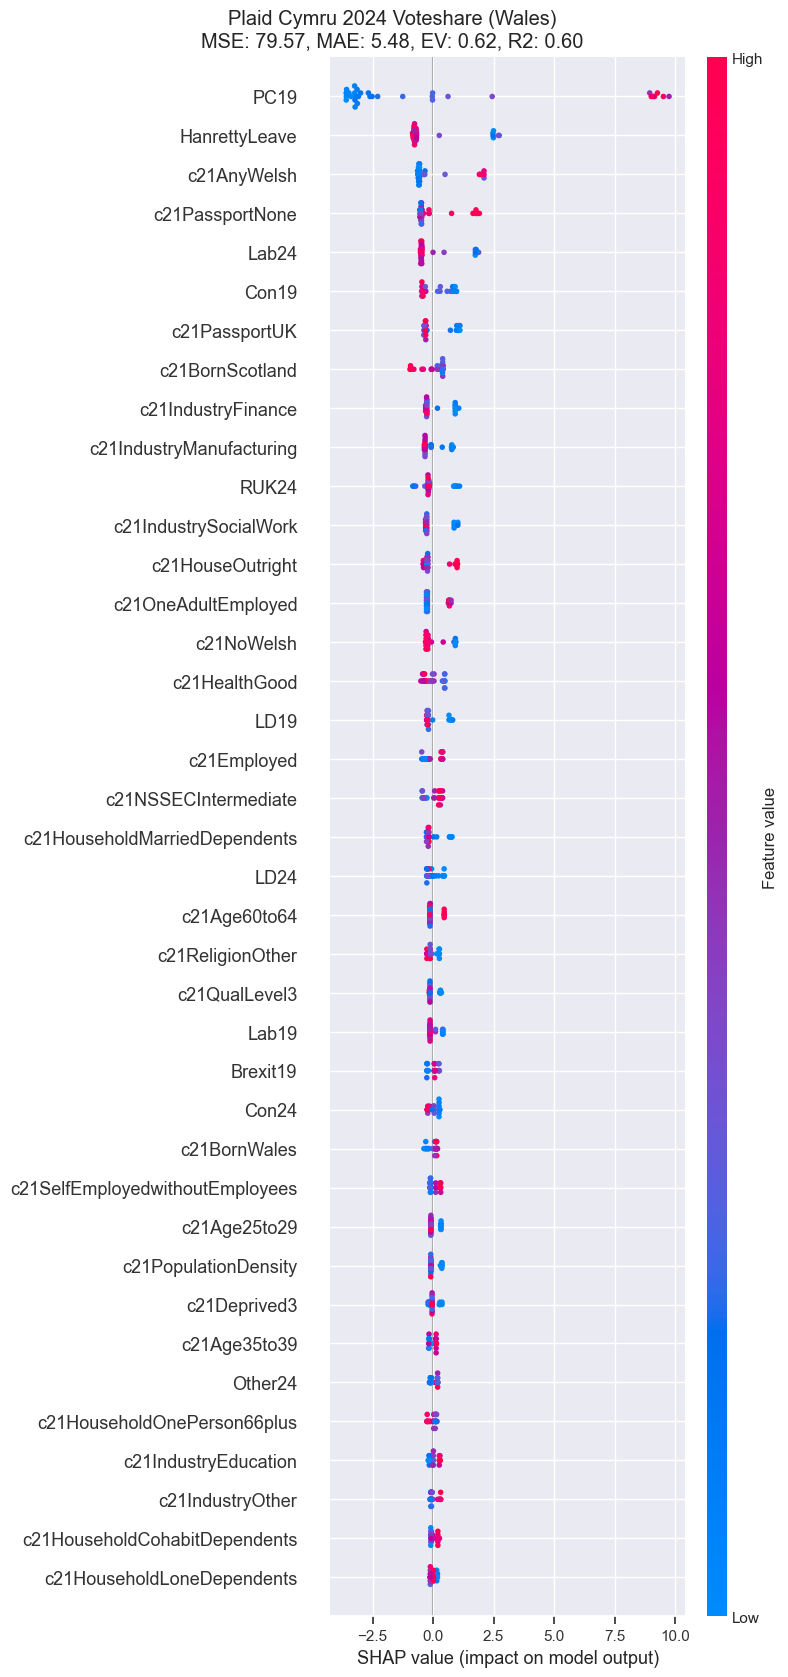

In [121]:
# %%time
name="PC24"

wales = scott_dataset[census_welsh_vars[0]].notnull()
wales_drops = list(scott_dataset_num[wales].var()[scott_dataset_num[wales].var()==0].index)
# df, corr_type = make_corr_summary(scott_dataset_num[wales], name)
# display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Plaid Cymru 2024 Voteshare (Wales)",dataset=scott_dataset_num[wales],
                                                    var_list = [name],var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"]+wales_drops,
    verbosity=0,dont_stop_on_sample_size_err=True,minimum_sample=30)

In [126]:
scott_dataset_num.columns[0:50]

Index(['Con24', 'Lab24', 'LD24', 'SNP24', 'PC24', 'Green24', 'RUK24',
       'Other24', 'Majority24', 'Turnout24', 'Con19', 'Lab19', 'LD19', 'SNP19',
       'PC19', 'Green19', 'Brexit19', 'Other19', 'Majority19', 'Turnout19',
       'HanrettyLeave', 'HanrettyRemain', 'ScotRefYes', 'ScotRefNo',
       'c21PopulationDensity', 'c21Households', 'c21Communal', 'c21Female',
       'c21Male', 'c21Age0to4', 'c21Age5to9', 'c21Age10to15', 'c21Age16to19',
       'c21Age20to24', 'c21Age25to29', 'c21Age30to34', 'c21Age35to39',
       'c21Age40to44', 'c21Age45to49', 'c21Age50to54', 'c21Age55to59',
       'c21Age60to64', 'c21Age65to69', 'c21Age70to74', 'c21Age75to79',
       'c21Age80to84', 'c21Age85plus', 'c21HouseOutright', 'c21HouseMortgage',
       'c21HouseSocialLA'],
      dtype='object')

In [127]:
vote_vars = ['Con24', 'Lab24', 'LD24', 'SNP24', 'PC24', 'Green24', 'RUK24',
       'Other24', 'Majority24', 'Turnout24', 'Con19', 'Lab19', 'LD19', 'SNP19',
       'PC19', 'Green19', 'Brexit19', 'Other19', 'Majority19', 'Turnout19',]

,r,p,N
HanrettyLeave,0.860000,0.00,632
c21NSSECLowerSupervisor,0.750000,0.00,575
c21HouseholdCohabitDependents,0.740000,0.00,575
c21HouseholdCohabitNondependents,0.710000,0.00,575
c21QualLevel2,0.690000,0.00,575
c21QualApprentice,0.680000,0.00,575
c21NSSECSemiRoutine,0.670000,0.00,575
c21QualLevel1,0.660000,0.00,575
c21HealthFair,0.650000,0.00,575
c21NSSECRoutine,0.620000,0.00,575


MSE: 17.52, MAE: 2.43, EV: 0.65, R2: 0.65


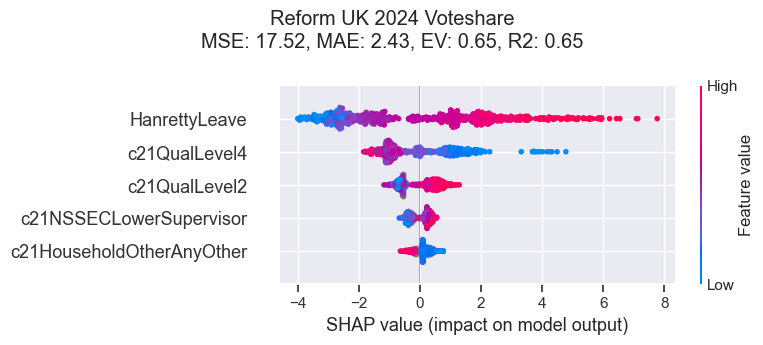

CPU times: total: 1.56 s
Wall time: 1.35 s


In [153]:
%%time
name="RUK24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Reform UK 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],
    var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"]+vote_vars,verbosity=0,min_features=5,threshold=.2)

,r,p,N
Con19,0.880000,0.00,632
c21CarsFour,0.740000,0.00,575
c21CarsThree,0.730000,0.00,575
c21CarsTwo,0.710000,0.00,575
c21HouseholdOneFamily66plus,0.650000,0.00,575
c21HouseholdMarriedNoChildren,0.620000,0.00,575
c21HouseOutright,0.590000,0.00,575
c21NSSECSmallEmployer,0.590000,0.00,575
c21Age85plus,0.580000,0.00,632
c21NSSECHigherManager,0.570000,0.00,575


MSE: 30.69, MAE: 3.95, EV: 0.73, R2: 0.73


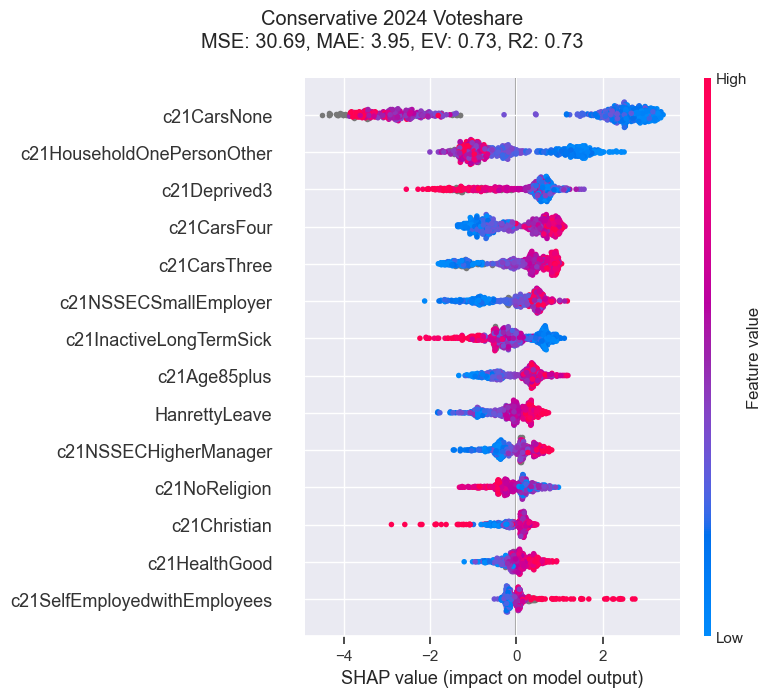

CPU times: total: 1.36 s
Wall time: 1.45 s


In [150]:
%%time
name="Con24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Conservative 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],
    var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"]+vote_vars,verbosity=0,min_features=5,threshold=.2)

,r,p,N
Lab19,0.820000,0.00,632
c21CarsNone,0.690000,0.00,575
c21HouseholdOnePersonOther,0.650000,0.00,575
c21Deprived3,0.600000,0.00,575
c21HouseholdLoneDependents,0.600000,0.00,575
Majority24,0.570000,0.00,632
c21Age25to29,0.570000,0.00,632
c21PopulationDensity,0.560000,0.00,575
c21NSSECNeverWorked,0.560000,0.00,575
c21Age30to34,0.550000,0.00,632


MSE: 50.43, MAE: 5.12, EV: 0.74, R2: 0.74


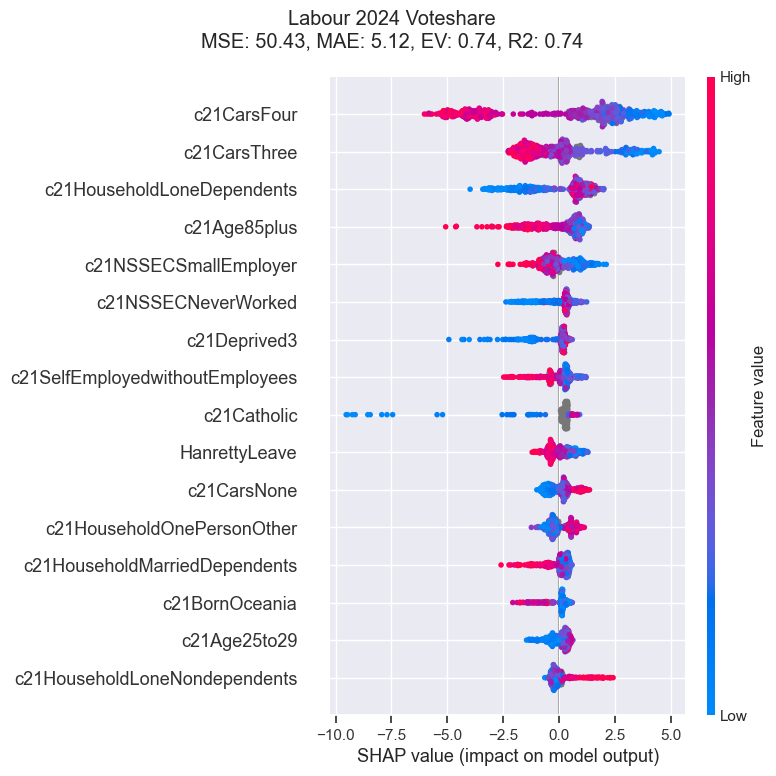

CPU times: total: 3.58 s
Wall time: 2.99 s


In [149]:
%%time
name="Lab24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Labour 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],
    var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"]+vote_vars,verbosity=0,min_features=5,threshold=.3)

,r,p,N
LD19,0.830000,0.00,632
c21BornOceania,0.610000,0.00,632
c21DeprivedNone,0.580000,0.00,575
c21NSSECHigherManager,0.580000,0.00,575
c21PassportOceania,0.570000,0.00,632
Turnout24,0.570000,0.00,632
c21NSSECLowerManager,0.550000,0.00,575
c21NSSECHigherProfessional,0.550000,0.00,575
Turnout19,0.540000,0.00,632
c21IndustryProfessional,0.520000,0.00,575


MSE: 82.64, MAE: 5.53, EV: 0.54, R2: 0.54


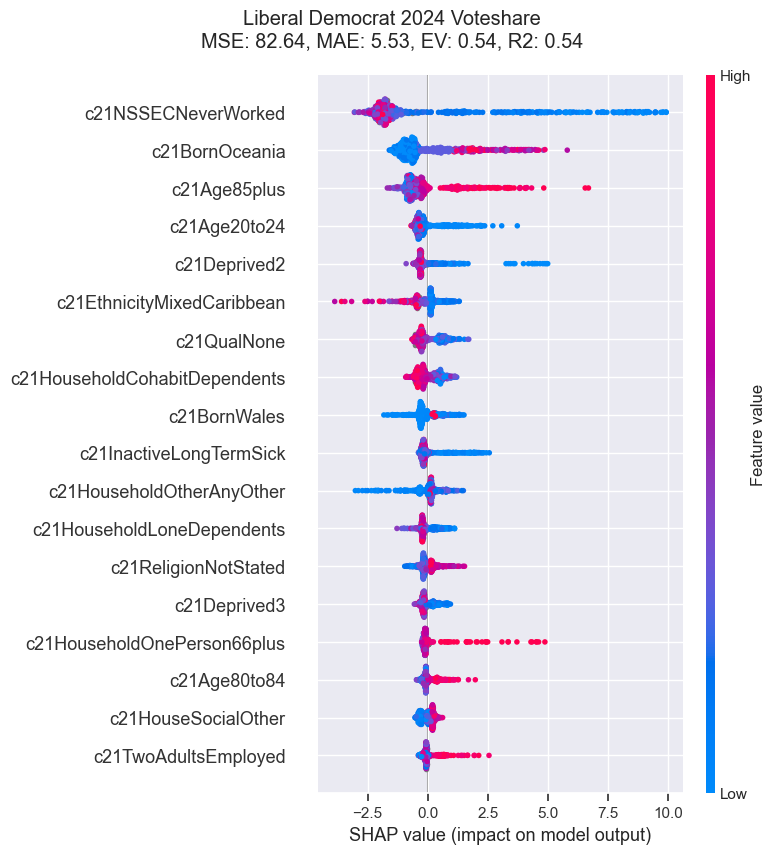

CPU times: total: 1.34 s
Wall time: 1.74 s


In [147]:
%%time
name="LD24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Liberal Democrat 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],
    var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"]+vote_vars,verbosity=0,min_features=5,threshold=.2)

,r,p,N
c21EthnicityMixed,0.560000,0.00,632
Lab19,0.530000,0.00,632
c21EthnicityBlack,0.520000,0.00,632
c21EthnicityMixedAfrican,0.520000,0.00,575
c21EthnicityOther,0.510000,0.00,632
c21EthnicityMixedOther,0.500000,0.00,575
c21EthnicityAnyOther,0.500000,0.00,632
c21EthnicityBlackOther,0.500000,0.00,632
c21EthnicityBlackCaribbean,0.500000,0.00,632
c21EthnicityBlackAfrican,0.500000,0.00,632


MSE: 18.58, MAE: 2.37, EV: 0.36, R2: 0.36


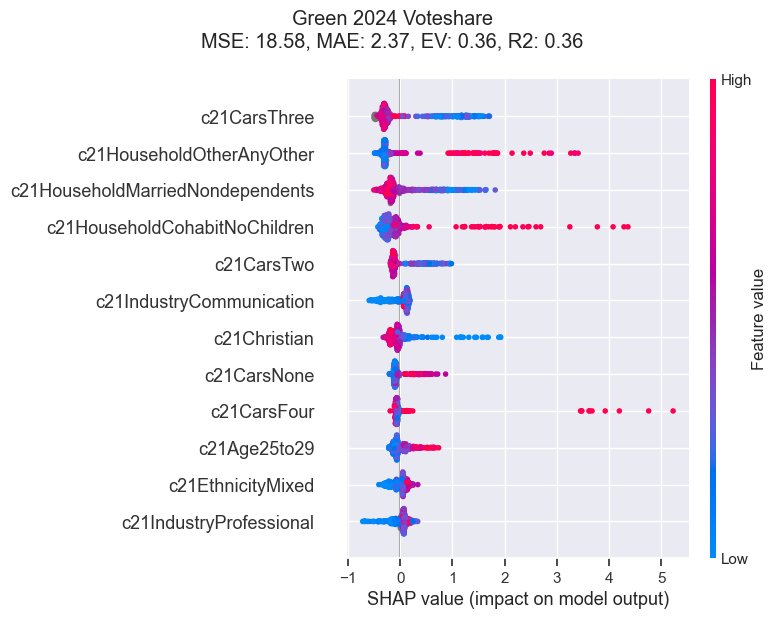

CPU times: total: 1.83 s
Wall time: 1.44 s


In [146]:
%%time
name="Green24"

df, corr_type = make_corr_summary(scott_dataset_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Green 2024 Voteshare",dataset=scott_dataset_num,
                                                    var_list = [name],
    var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"]+vote_vars,verbosity=0,min_features=6,threshold=.1)

MSE: 25.48, MAE: 3.46, EV: 0.23, R2: 0.22


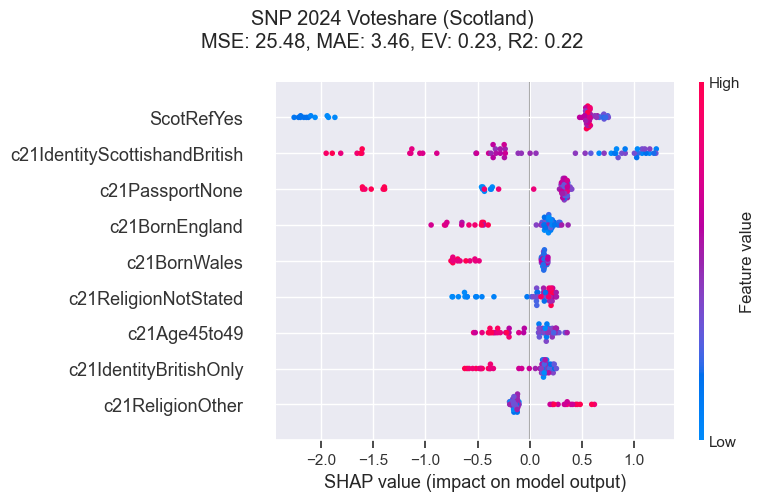

CPU times: total: 812 ms
Wall time: 688 ms


In [138]:
%%time
name="SNP24"
scot_drops = list(scott_dataset_num[scotland].var()[scott_dataset_num[scotland].var()==0].index)
# df, corr_type = make_corr_summary(scott_dataset_num[scotland], name)
# display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "SNP 2024 Voteshare (Scotland)",dataset=scott_dataset_num[scotland],
                                                    var_list = [name],
    var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange","ScotRefNo"]+scot_drops+vote_vars,
    verbosity=0,min_features=5,threshold=.2)

MSE: 156.70, MAE: 9.14, EV: 0.25, R2: 0.22


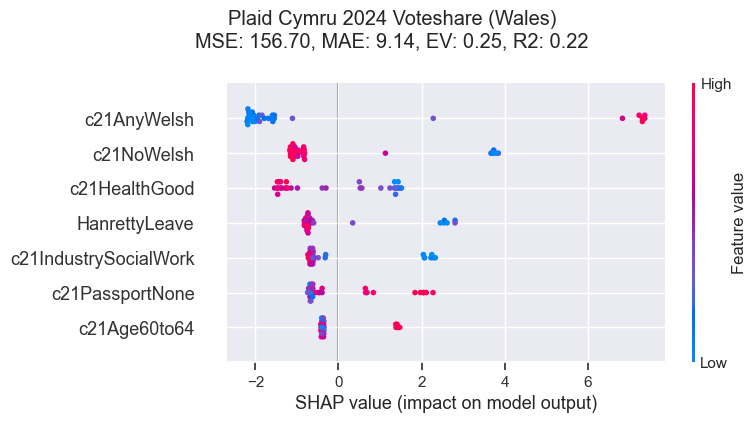

In [143]:
# %%time
name="PC24"

wales = scott_dataset[census_welsh_vars[0]].notnull()
wales_drops = list(scott_dataset_num[wales].var()[scott_dataset_num[wales].var()==0].index)
# df, corr_type = make_corr_summary(scott_dataset_num[wales], name)
# display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Plaid Cymru 2024 Voteshare (Wales)",dataset=scott_dataset_num[wales],
                                                    var_list = [name],
    var_stub_list = [name,"Majority","HanrettyRemain","IndexOfChange"]+wales_drops+vote_vars,
    verbosity=0,dont_stop_on_sample_size_err=True,minimum_sample=30,min_features=5,threshold=.5)